<a href="https://colab.research.google.com/github/MercyOnHisSoul/0005project/blob/master/fianal_version_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, os
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    file_name = 'version_5.ipynb'
    import subprocess
    path_to_file = subprocess.check_output('find . -type f -name ' + str(file_name), shell=True).decode("utf-8")
    print(path_to_file)
    path_to_file = path_to_file.replace(file_name,"").replace('\n',"")
    os.chdir(path_to_file)
    !pwd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
./gdrive/My Drive/Colab Notebooks/version_5.ipynb

/content/gdrive/My Drive/Colab Notebooks


In [0]:
# Read test and train fileimport numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() 

# DF generation

In [0]:
# import test and train file
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [0]:
# making a dict of ingredients with their total used times in the data set
ingredientData = pd.DataFrame(train[['ingredients']])
ingredientDict = {}
for i in range(0,39774):
    for ingredient in ingredientData.iloc[i][0]:
        if ingredient not in ingredientDict.keys():
            ingredientDict[ingredient] = 1
        else:
            ingredientDict[ingredient]+=1

In [0]:
# sorting the dictionary according to its value
sorted_dict={}
sorted_keys=sorted(ingredientDict, key=ingredientDict.get, reverse=True)
for r in sorted_keys:
    sorted_dict[r]= ingredientDict[r]

In [0]:
# # removing the common ingredients
# useless=[]
# for key in sorted_dict.keys():
#     useless.append(key)
#     if len(useless)==12:
#         break
# for i in useless:
#     del sorted_dict[i]

In [0]:
# getting the top 100 ingredients
top100=[]
for key in sorted_dict.keys():
    top100.append(key)
    if len(top100)==100:
        break

In [0]:
import numpy as np
top100 = np.array(top100)

In [0]:
# # creating a new dataset for Machine Learning
# mlDict = {}
# for top_ingredient in top100:
#     mlDict[top_ingredient]=[]
#     for i in range(0,39774):
#         if top_ingredient in train.iloc[i]['ingredients']:
#             mlDict[top_ingredient].append(1)
#         else:
#             mlDict[top_ingredient].append(0)

In [0]:
# cuisine = []
# id_=[]
# for i in range(0,39774):
#         cuisine.append(train.iloc[i]['cuisine'])
#         id_.append(train.iloc[i]['id'])
# mlDict['id']=id_
# mlDict['cuisine']= cuisine

In [0]:
# mlDF=pd.DataFrame(mlDict)
# mlDF['cuisine'] = mlDF['cuisine'].astype('category')
# mlDF[top100] = mlDF[top100].astype('category')

In [0]:
# # extract into CSV file
# machine_learning_csv = mlDF.to_csv (r'C:\Users\e180172\Desktop\pro\project\machine_learning_csv0.csv', index = None, header=True)
# #Don't forget to add '.csv' at the end of the path

In [32]:
mlDF = pd.read_csv('machine_learning_csv0.csv')
mlDF

,salt,onions,olive oil,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,pepper,vegetable oil,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,unsalted butter,ground cumin,extra-virgin olive oil,black pepper,milk,chili powder,oil,red bell pepper,purple onion,scallions,grated parmesan cheese,sesame oil,corn starch,ginger,baking powder,jalapeno chilies,dried oregano,chopped cilantro fresh,fresh lemon juice,diced tomatoes,fresh parsley,...,lemon,rice vinegar,yellow onion,green bell pepper,cilantro leaves,tomato paste,heavy cream,cilantro,fresh basil,boneless skinless chicken breasts,flat leaf parsley,white sugar,lime juice,chicken stock,bay leaves,potatoes,chicken,corn tortillas,salsa,cumin,freshly ground pepper,ground turmeric,baking soda,sea salt,cumin seed,garam masala,shrimp,black beans,zucchini,ground beef,large garlic cloves,dried thyme,flour tortillas,tomato sauce,buttermilk,plum tomatoes,coconut milk,granulated sugar,id,cuisine
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10259,greek
1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25693,southern_us
2,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20130,filipino
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22213,indian
4,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13162,indian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29109,irish
39770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11462,italian
39771,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2238,irish
39772,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41882,chinese


# Cleaning: one step further

In [33]:
# get all the unique values of cuisines
cuisineList = set()
for x in mlDF['cuisine']:
    cuisineList.add(x)
print(cuisineList)

{'chinese', 'vietnamese', 'moroccan', 'russian', 'brazilian', 'filipino', 'french', 'cajun_creole', 'mexican', 'irish', 'southern_us', 'japanese', 'greek', 'jamaican', 'thai', 'british', 'italian', 'spanish', 'korean', 'indian'}


In [0]:
# mapping all the string values of cuisines to int, based on the list above
cuisinesInNum = dict([(y,x+1) for x,y in enumerate(sorted(set(mlDF['cuisine'])))])
# print([cuisinesInNum[x] for x in mlDF['cuisine']])

In [35]:
cuisineList

{'brazilian',
 'british',
 'cajun_creole',
 'chinese',
 'filipino',
 'french',
 'greek',
 'indian',
 'irish',
 'italian',
 'jamaican',
 'japanese',
 'korean',
 'mexican',
 'moroccan',
 'russian',
 'southern_us',
 'spanish',
 'thai',
 'vietnamese'}

In [0]:
# now replace the strings by int in the dataset
mlDF['cuisine'] = [cuisinesInNum[x] for x in mlDF['cuisine']]

In [0]:
# print(len(mlDF['cuisine']))
# print(len([cuisinesInNum[x] for x in mlDF['cuisine']]))

In [38]:
# okay well look at it, nice
mlDF

,salt,onions,olive oil,water,garlic,sugar,garlic cloves,butter,ground black pepper,all-purpose flour,pepper,vegetable oil,eggs,soy sauce,kosher salt,green onions,tomatoes,large eggs,carrots,unsalted butter,ground cumin,extra-virgin olive oil,black pepper,milk,chili powder,oil,red bell pepper,purple onion,scallions,grated parmesan cheese,sesame oil,corn starch,ginger,baking powder,jalapeno chilies,dried oregano,chopped cilantro fresh,fresh lemon juice,diced tomatoes,fresh parsley,...,lemon,rice vinegar,yellow onion,green bell pepper,cilantro leaves,tomato paste,heavy cream,cilantro,fresh basil,boneless skinless chicken breasts,flat leaf parsley,white sugar,lime juice,chicken stock,bay leaves,potatoes,chicken,corn tortillas,salsa,cumin,freshly ground pepper,ground turmeric,baking soda,sea salt,cumin seed,garam masala,shrimp,black beans,zucchini,ground beef,large garlic cloves,dried thyme,flour tortillas,tomato sauce,buttermilk,plum tomatoes,coconut milk,granulated sugar,id,cuisine
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10259,7
1,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25693,17
2,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20130,5
3,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22213,8
4,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13162,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29109,9
39770,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11462,10
39771,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2238,9
39772,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41882,4


# floating and split

In [0]:
from sklearn.model_selection import train_test_split

# train test split
y = mlDF['cuisine']
X = mlDF[top100]    

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_train = y_train.values
X_train = X_train

In [0]:
X_train = X_train / 1.0
y_train = y_train / 1.0
X_test = X_test / 1.0
y_test = y_test / 1.0

In [44]:
X_train.shape

(29830, 100)

In [0]:
# convert it into arraylist
X_train_num = X_train.to_numpy()

In [46]:
X_train_num

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y_train

array([10., 14., 14., ..., 10., 10., 17.])

# SMOTE(Synthetic Minority Over-sampling Technique)
SMOTE is an over-sampling method. It creates synthetic samples of the minority class. We use imblearn python package to over-sample the minority classes .

In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE('minority')

X_sm, y_sm = smote.fit_sample(X_train_num, y_train)
print(X_sm.shape, y_sm.shape)

(35389, 100) (35389,)


# now here comes TF

In [49]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
import os
os.environ["PATH"] = os.pathsep + 'C:\\Users\\WangHaoyu\\Miniconda3\\Library\\bin\\graphviz'
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
# create our model using according activation
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(2000.0, activation=tf.nn.relu),
                                    # tf.keras.layers.Dense(1024.0, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(500.0, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(100.0, activation=tf.nn.relu),
                                    # tf.keras.layers.Dense(30.0, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(21.0, activation=tf.nn.softmax)])

In [0]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [0]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)  
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))  

In [54]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [55]:
model.compile(optimizer = tf.train.AdamOptimizer(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_num, y_train, epochs=10,
          batch_size=128,verbose=2,validation_split=0.2)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 23864 samples, validate on 5966 samples
Epoch 1/10
23864/23864 - 5s - loss: 1.6750 - acc: 0.5040 - val_loss: 1.5313 - val_acc: 0.5307
Epoch 2/10
23864/23864 - 5s - loss: 1.4020 - acc: 0.5680 - val_loss: 1.4676 - val_acc: 0.5520
Epoch 3/10
23864/23864 - 4s - loss: 1.3161 - acc: 0.5914 - val_loss: 1.4623 - val_acc: 0.5496
Epoch 4/10
23864/23864 - 4s - loss: 1.2379 - acc: 0.6130 - val_loss: 1.4675 - val_acc: 0.5533
Epoch 5/10
23864/23864 - 4s - loss: 1.1558 - acc: 0.6390 - val_loss: 1.4949 - val_acc: 0.5508
Epoch 6/10
23864/23864 - 4s - loss: 1.0726 - acc: 0.6588 - val_loss: 1.5213 - val_acc: 0.5518
Epoch 7/10
23864/23864 - 4s - loss: 0.9927 - acc: 0.6819 - val_loss: 1.5638 - val_acc: 0.5397
Epoch 8/10
23864/23864 - 4s - loss: 0.9009 - acc: 0.7097 - val_loss: 1.6566 - val_acc: 0.5339
Epoch 9/10
23864/23864 - 4s - loss: 0.8216 - acc: 0.7324 - val_loss: 1.7393 - val_acc: 0.5324
Epoch 10/10
23864/23864 

In [56]:
model.evaluate(X_test, y_test,batch_size=128,verbose=2)

9944/9944 - 0s - loss: 1.7434 - acc: 0.5402


[1.7434045588500253, 0.54022527]

# TF with SMOTE

In [59]:
model.fit(X_sm, y_sm, epochs=10,
          batch_size=128,verbose=2,validation_split=0.2)

Train on 28311 samples, validate on 7078 samples
Epoch 1/10
28311/28311 - 5s - loss: 0.7740 - acc: 0.7885 - val_loss: 1.4560 - val_acc: 0.5893
Epoch 2/10
28311/28311 - 5s - loss: 0.5818 - acc: 0.8209 - val_loss: 1.3712 - val_acc: 0.6225
Epoch 3/10
28311/28311 - 5s - loss: 0.5021 - acc: 0.8397 - val_loss: 1.3690 - val_acc: 0.6372
Epoch 4/10
28311/28311 - 5s - loss: 0.4567 - acc: 0.8507 - val_loss: 1.4572 - val_acc: 0.6070
Epoch 5/10
28311/28311 - 5s - loss: 0.4319 - acc: 0.8551 - val_loss: 1.4217 - val_acc: 0.6375
Epoch 6/10
28311/28311 - 5s - loss: 0.4189 - acc: 0.8596 - val_loss: 1.4247 - val_acc: 0.6482
Epoch 7/10
28311/28311 - 5s - loss: 0.4021 - acc: 0.8660 - val_loss: 1.4303 - val_acc: 0.6327
Epoch 8/10
28311/28311 - 5s - loss: 0.3941 - acc: 0.8690 - val_loss: 1.5252 - val_acc: 0.6427
Epoch 9/10
28311/28311 - 5s - loss: 0.3919 - acc: 0.8669 - val_loss: 1.4930 - val_acc: 0.6416
Epoch 10/10
28311/28311 - 5s - loss: 0.3908 - acc: 0.8679 - val_loss: 1.4847 - val_acc: 0.6530


In [60]:
model.evaluate(X_test, y_test,batch_size=128,verbose=2)

9944/9944 - 0s - loss: 2.8776 - acc: 0.5263


[2.8776330951712157, 0.5263475]

# Data transformation

In [0]:
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
# transforming
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)

# 1. Random forests

In [62]:
%%time
from sklearn.ensemble import RandomForestClassifier

# Random Forest using Train Data
clf = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)  # create the  object
clf.fit(X_train, y_train)                    # train the model

y_train_pred = clf.predict(X_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train))
print("On test set             \t:", clf.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9014415018437815
On test set             	: 0.54487743557511

CPU times: user 14.3 s, sys: 569 ms, total: 14.9 s
Wall time: 7.92 s


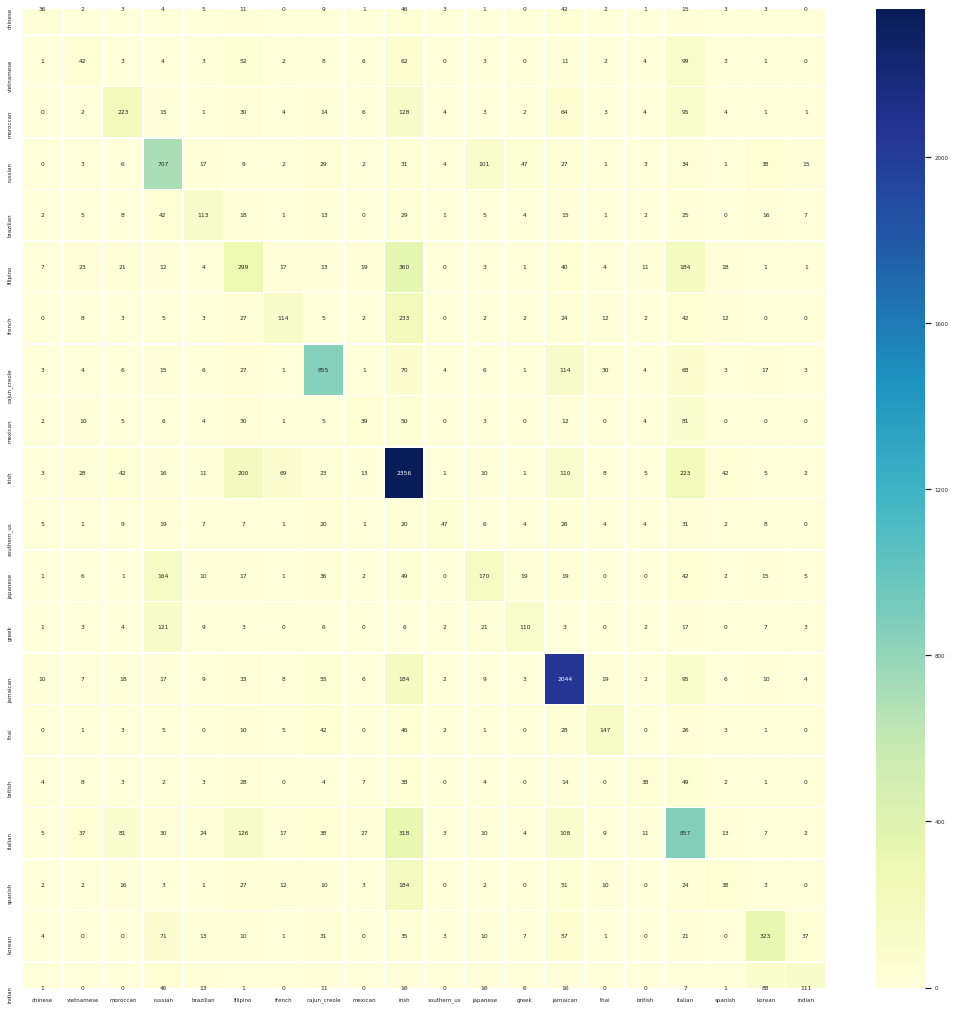

In [64]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)

# df_cm = pd.DataFrame(cm)


sb.set(font_scale=0.5)#for label size
# sb.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

# plt.show()
df_cm = pd.DataFrame(cm, index = [i for i in cuisineList],
                  columns = [i for i in cuisineList])
plt.figure(figsize = (18,18))
sb.heatmap(df_cm, annot=True, fmt="d",linewidths=.5,cmap="YlGnBu")

# Random forests with transformed data

In [65]:
clf.fit(X_train, y_train)                    # train the model

y_train_pred = clf.predict(X_train_transformed)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train_transformed, y_train))
print("On test set             \t:", clf.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9014415018437815
On test set             	: 0.54487743557511



# Random Forests with SMOTE

In [66]:
clf = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)  # create the  object
clf.fit(X_sm, y_sm)                    # train the model

y_train_pred = clf.predict(X_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_sm, y_sm))
print("On test set             \t:", clf.score(X_test, y_test))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9055356184125011
On test set             	: 0.671904462602137


# 2. KNN_clf

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=2, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=4, p=2,
                     weights='distance')

In [68]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn_clf.score(X_train, y_train))
print("On test set             \t:", knn_clf.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8929768689239022
On test set             	: 0.43676932746700187



# KNN with transformed data

In [69]:
knn_clf.fit(X_train_transformed, y_train)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn_clf.score(X_train_transformed, y_train))
print("On test set             \t:", knn_clf.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.895239691585652
On test set             	: 0.1558139534883721



# KNN with SMOTE

In [1]:
knn_clf.fit(X_sm, y_sm)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", knn_clf.score(X_sm, y_sm))
print("On test set             \t:", knn_clf.score(X_test, y_test))
print()

NameError: ignored

# 3. SVM

In [0]:
%%time
from sklearn import svm

svm_clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_clf.score(X_train, y_train)                           

In [0]:
y_pred = svm_clf.predict(X_test)

accuracy_score(y_test, y_pred)

print("Classification Accuracy \t:", svm_clf.score(X_test, y_pred))
print("On test set             \t:", svm_clf.score(X_test, y_test))


# 4. logistic regression

In [0]:
import sklearn
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split

# Normalize grades to values between 0 and 1 for more efficient computation
normalized_range = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))

# Scikit Logistic Regression
scikit_log_reg = LogisticRegression()
scikit_log_reg.fit(X_train,y_train)
print("Classification Accuracy \t:", scikit_log_reg.score(X_train, y_train))
#Score is Mean Accuracy
scikit_score = clf.score(X_test, y_test)
print ('Scikit score: ', scikit_score)

# 5. naive bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
print("Classification Accuracy \t:", clf.score(X_train, y_train))
# clf_pf = GaussianNB()
# clf_pf.partial_fit(X, Y, np.unique(Y))
# GaussianNB(priors=None, var_smoothing=1e-09)
# print(clf_pf.predict([[-0.8, -1]]))

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
print("Classification Accuracy \t:", clf.score(X_train, y_train))

In [0]:
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train, y_train)
print("Classification Accuracy \t:", clf.score(X_train, y_train))

In [0]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

print("Classification Accuracy \t:", clf.score(X_train, y_train))

# 6. neural network

In [0]:
%%time
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(300, 50,10), random_state=1)

clf.fit(X_train, y_train)
print("Classification Accuracy \t:", clf.score(X_train, y_train))


In [0]:
%%time
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,
                    hidden_layer_sizes=(300, 50,10), random_state=1)

clf.fit(X_train, y_train)
print("Classification Accuracy \t:", clf.score(X_train, y_train))

In [0]:
%%time
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(300, 300, 100), random_state=1)

clf.fit(X_train, y_train)
print("Classification Accuracy \t:", clf.score(X_train, y_train))